In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.io_utils import *
from src.metrics import *
from src.viz import *

df = read_data("data/ecommerce_sales.csv")

df_clean = clean_data(df)

print("---" * 50)
print()
print("Here is a sample of our data:")
print()
print(df_clean.sample(3))
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Here is a sample of our data:

      order_id       date      city     category   price  units  revenue
1052    101052 2024-04-15   Uppsala       Sports  598.66      2  1197.32
1014    101014 2024-02-14     Malmö       Beauty   93.87      2   187.74
1765    101765 2024-04-24  Göteborg  Electronics  740.73      1   740.73

------------------------------------------------------------------------------------------------------------------------------------------------------


## Total revenue and units sold

In [2]:
print("---" * 50)
print()
print(f"In 2024 we sold a total of {total_units(df_clean)} units,\n"
      f"for a total revenue of {total_revenue(df_clean)} sek.")
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

In 2024 we sold a total of 7463 units,
for a total revenue of 3502767.23 sek.

------------------------------------------------------------------------------------------------------------------------------------------------------


## Average Order

In [3]:
print("---" * 50)
print()
print(f"Th average order value is {average_order(df_clean)} sek.")
print()
print("---" * 50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Th average order value is 1401.11 sek.

------------------------------------------------------------------------------------------------------------------------------------------------------


## Revenue per category

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 categories per revenue are:
      category  tot_rev_cat
0  Electronics   1364228.07
1       Sports    734653.42
2     Clothing    586744.91.
Figure(700x500)

------------------------------------------------------------------------------------------------------------------------------------------------------


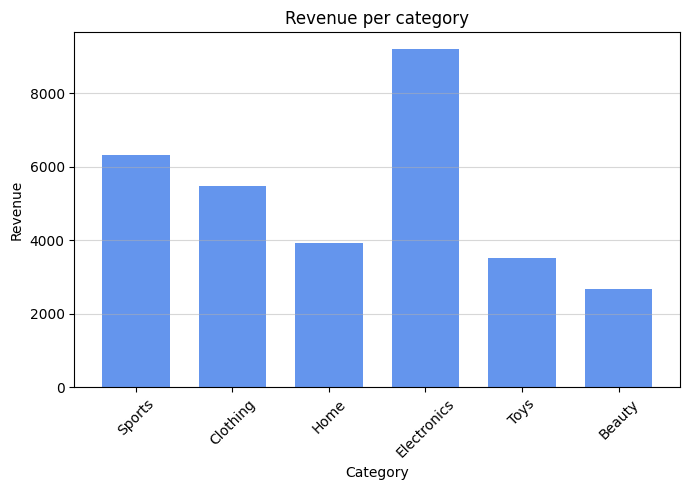

In [4]:
print("---" * 50)
print()
print(f"The top 3 categories per revenue are:\n"
      f"{revenue_per_category(df_clean).head(3)}.")
print(plot_per_category(df_clean))
print()
print("---" * 50)

## Revenue per city

------------------------------------------------------------------------------------------------------------------------------------------------------

The top 3 cities per revenue are:
        city  tot_rev_city
0  Stockholm    1227201.94
1   Göteborg     859019.65
2      Malmö     567926.32.
Figure(700x500)

------------------------------------------------------------------------------------------------------------------------------------------------------


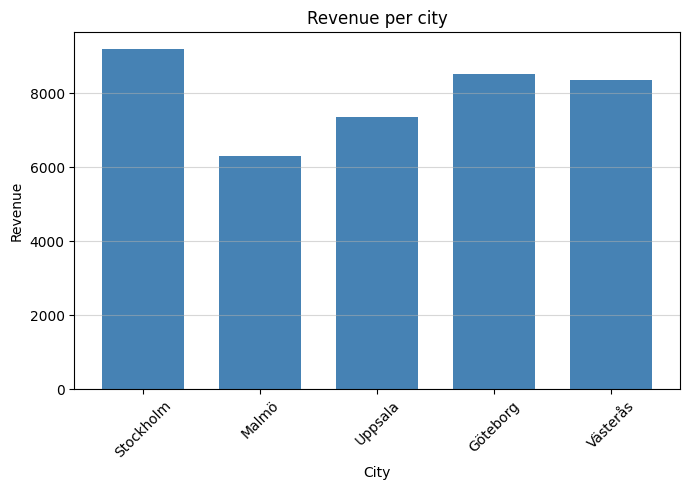

In [5]:
print("---" * 50)
print()
print(f"The top 3 cities per revenue are:\n"
      f"{revenue_per_city(df_clean).head(3)}.")
print(plot_per_city(df_clean))
print()
print("---" * 50)

## Revenue per month

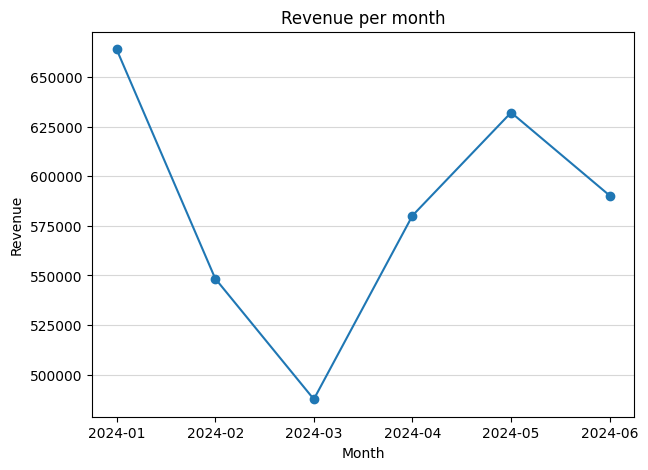

In [6]:
df_monthly_revenue = revenue_per_month(df_clean)

fig, ax = plt.subplots(figsize=(7,5))
line(ax, df_monthly_revenue["month"], df_monthly_revenue["rev_per_month"],"Revenue per month", "Month", "Revenue")
plt.show()